This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [13]:
data = pd.read_csv('data1.csv')
df = data.copy() 

In [14]:
df.head(10)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo
5,989,2019-04-19 05:41:52,MADRID,VALENCIA,2019-06-17 06:08:00,2019-06-17 12:55:00,REGIONAL,28.35,Turista,Adulto ida
6,990,2019-04-19 05:41:52,MADRID,VALENCIA,2019-06-17 12:21:00,2019-06-17 19:04:00,REGIONAL,28.35,Turista,Adulto ida
7,991,2019-04-19 05:41:52,MADRID,VALENCIA,2019-06-17 16:05:00,2019-06-17 22:47:00,REGIONAL,28.35,Turista,Adulto ida
8,992,2019-04-19 05:42:00,MADRID,VALENCIA,2019-06-16 06:20:00,2019-06-16 12:55:00,REGIONAL,28.35,Turista,Adulto ida
9,993,2019-04-19 05:42:00,MADRID,VALENCIA,2019-06-16 12:42:00,2019-06-16 19:04:00,REGIONAL,28.35,Turista,Adulto ida


In [15]:
df.drop('Unnamed: 0', axis=True, inplace=True)

In [16]:
df.shape

(215909, 9)

In [17]:
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

In [18]:
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


In [19]:
df.describe(include='all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


In [20]:
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

In [21]:
df['price'].fillna(df['price'].mean(),inplace=True)

In [22]:
df.dropna(inplace=True)

In [23]:
df.drop('insert_date',axis=1,inplace=True)

In [24]:
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

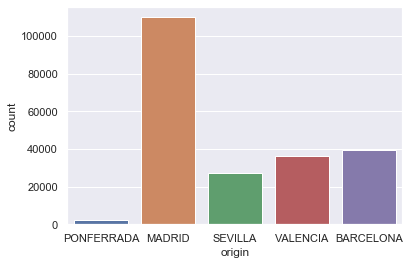

In [25]:
sns.countplot(x='origin', data=df);

We can see that majority of the people were boarded from Madrid

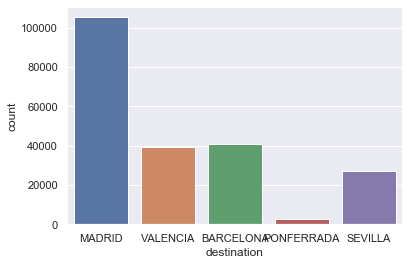

In [26]:
sns.countplot(x='destination', data=df);

From the above graphs we can visualize that also maximum number of people are coming to "Madrid" as the most of the people have their destination station as Madrid

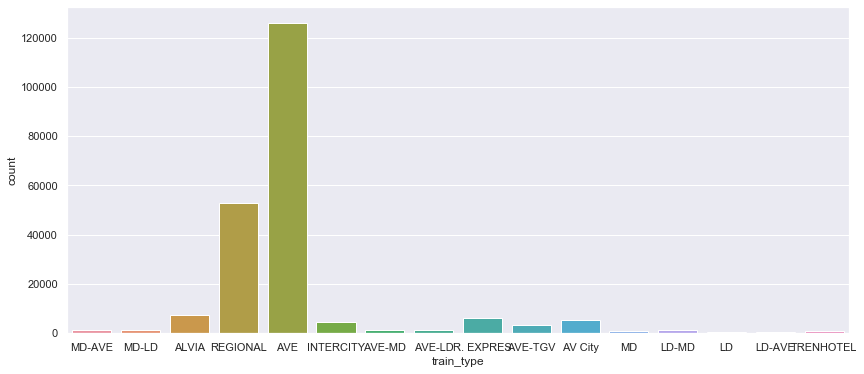

In [27]:
plt.figure(figsize=(14,6))
sns.countplot(x='train_type', data=df);

We can see that "AVE" runs maximum in number as compared to other train types.


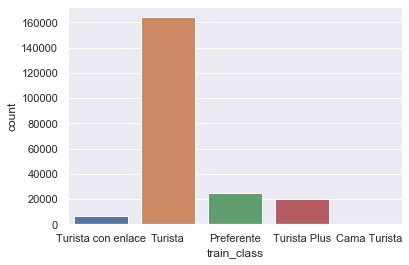

In [28]:
sns.countplot(x='train_class', data=df);

Turista is the most common train class for travelling among people in general

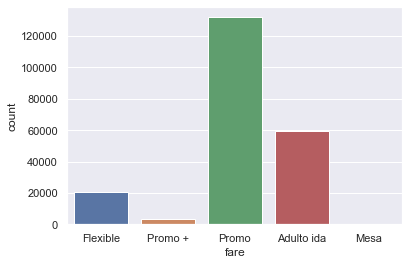

In [29]:
sns.countplot(x='fare', data=df);

Most of the tickets are Promo Fare

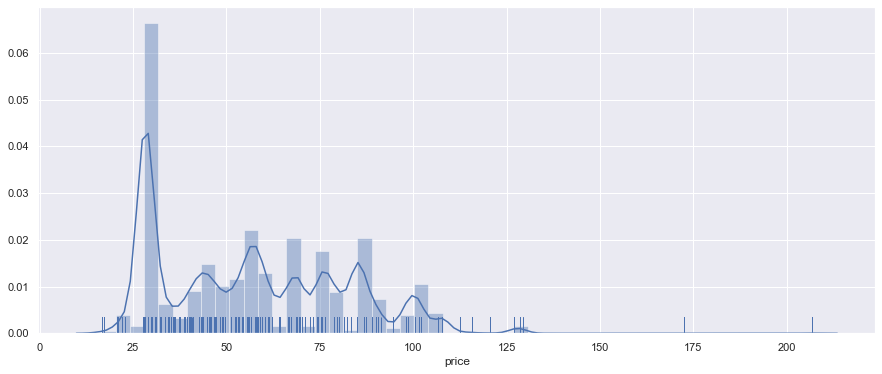

In [30]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'], rug=True);

Most of the passengers bought tickets between 25-30 and rest are between 45 to 100 $            

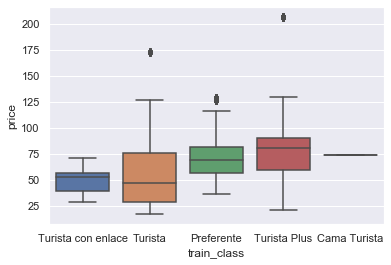

In [31]:
sns.boxplot(x='train_class',y='price',data=df);

"Turista Plus" is the train class with the highest ticket price and 'Turista' is one with the lowest price and most number people are buying tickets for 'Turista'

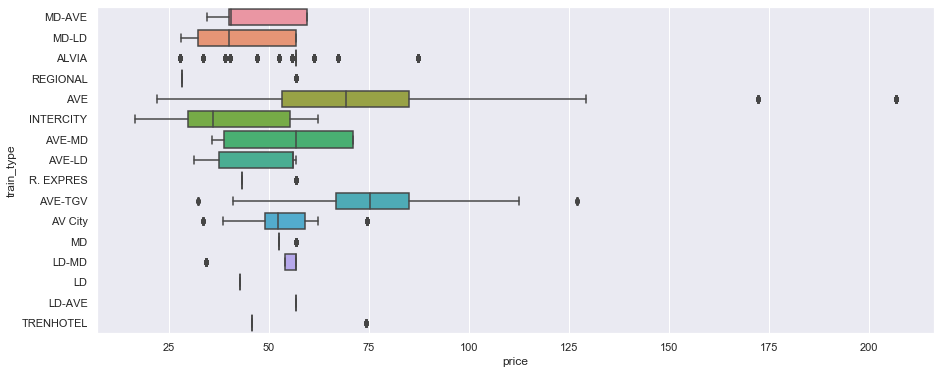

In [32]:
plt.figure(figsize=(15,6))
sns.boxplot(y='train_type',x='price',data=df);

The average price of the tickets of train type AVE and AVE-TGV are comparatilvely higher as compared to other train types.



## Feature Engineering


In [33]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**

In [34]:
import datetime

In [35]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [36]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 

In [37]:
df.head()

,index,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo,4.133333


#### **Removing redundant features**


In [38]:
df.drop(['start_date','end_date', 'index'],axis=1,inplace=True)
df.head()            

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333


Finding out the pricing and travel time from 'MADRID' to other destinations

## **Travelling from MADRID to SEVILLA**

In [39]:
df1 = df[(df['origin']=="MADRID") & (df['destination']=="SEVILLA")]
df1.head()

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
364,MADRID,SEVILLA,AV City,49.150000,Turista,Promo,2.916667
365,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.733333
366,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo,2.633333
367,MADRID,SEVILLA,AVE,76.300000,Turista,Flexible,2.533333
368,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.600000


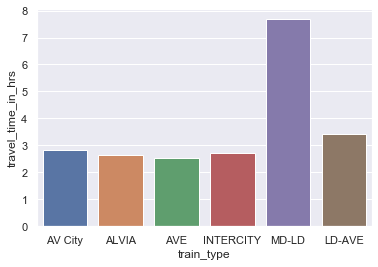

In [40]:
sns.barplot(x="train_type",y="travel_time_in_hrs",data=df1);

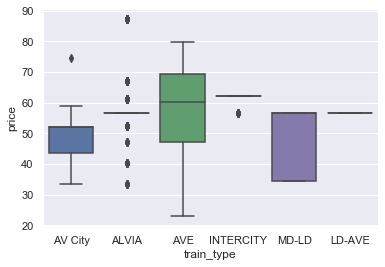

In [41]:
sns.boxplot(x="train_type",y="price",data=df1);

## **Travelling from MADRID to BARCELONA**


In [42]:
df1 = df[(df['origin']=="MADRID") & (df['destination']=="BARCELONA")]
df1.head()

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
79,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
80,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
81,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
82,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
83,MADRID,BARCELONA,AVE,66.75,Turista,Promo,3.150000


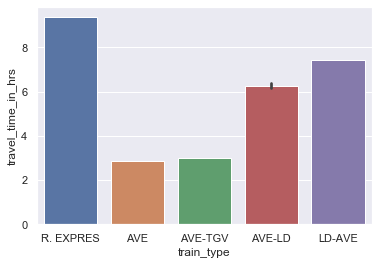

In [43]:
sns.barplot(x="train_type",y="travel_time_in_hrs",data=df1);

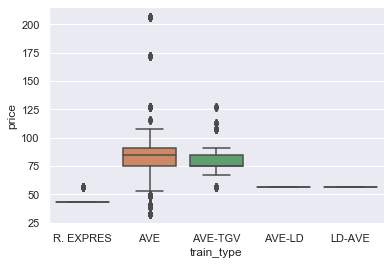

In [44]:
sns.boxplot(x="train_type",y="price",data=df1);

## **Travelling from MADRID to VALENCIA**

In [45]:
df1 = df[(df['origin']=="MADRID") & (df['destination']=="VALENCIA")]
df1.head()

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
5,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.783333
6,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.716667
7,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.700000
8,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.583333
9,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.366667


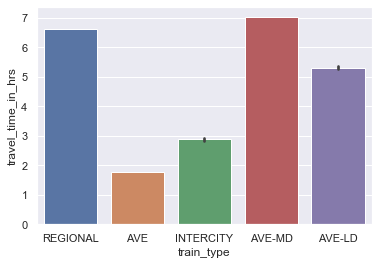

In [46]:
sns.barplot(x="train_type",y="travel_time_in_hrs",data=df1);

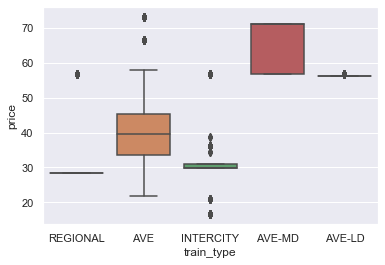

In [47]:
sns.boxplot(x="train_type",y="price",data=df1);

## **Travelling from MADRID to PONFERRADA**

In [36]:
df1 = df[(df['origin']=="MADRID") & (df['destination']=="PONFERRADA")]
df1.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
233,233,MADRID,PONFERRADA,AVE-MD,35.750000,Turista con enlace,Promo,3.883333
234,234,MADRID,PONFERRADA,AVE-LD,31.200000,Turista con enlace,Promo,4.200000
235,235,MADRID,PONFERRADA,ALVIA,33.500000,Turista,Promo,4.050000
236,236,MADRID,PONFERRADA,LD-MD,56.723877,Turista con enlace,Promo +,6.533333
237,237,MADRID,PONFERRADA,LD,42.750000,Turista con enlace,Promo +,4.200000


/Users/eam_aay_pee/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


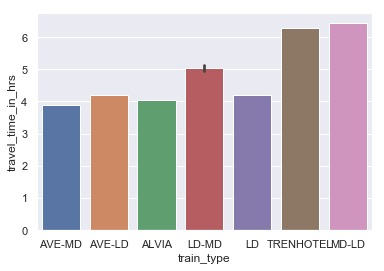

In [37]:
sns.barplot(x="train_type",y="travel_time_in_hrs",data=df1);

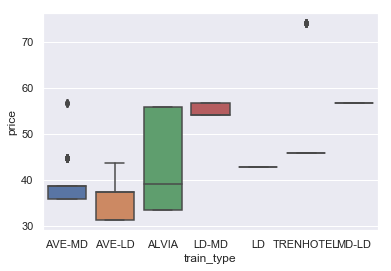

In [38]:
sns.boxplot(x="train_type",y="price",data=df1);

# Applying Linear  Regression

In [49]:
df.head()

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333


In [50]:
from sklearn.preprocessing import LabelEncoder

**Data Encoding**

In [ ]:
df.head()

In [41]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [42]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,2,1,11,59.50,4,1,4.700000
1,1,2,1,11,34.65,4,4,5.800000
2,2,2,1,12,39.95,4,4,5.916667
3,3,2,1,11,40.60,4,4,4.983333
4,4,2,1,0,27.90,2,3,4.133333


In [43]:
X = df.iloc[:,[1,2,3,5,6,7]].values
Y = df.iloc[:,4].values

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()             
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
lr.score(X_test,Y_test)

0.7235671432204519

In [49]:
lr_predict=lr.predict(X_test)

In [50]:
lr_predict_train=lr.predict(X_train)

#### R2 Score for the test data.

In [51]:
from sklearn.metrics import r2_score
lr_r2_test= r2_score(Y_test, lr_predict)

#### R2 Score for training data.

In [52]:
lr_r2_train= r2_score(Y_train, lr_predict_train)

### Comaparing training and testing R2 scores

In [53]:
print('R2 score for Linear Regression Testing Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Testing Data is:  0.7274387613842279
R2 score for Linear Regression Testing Data is:  0.7235671432204518


# Applying Polynomial Regression

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
poly_reg = PolynomialFeatures()

In [56]:
X_train_poly,X_test_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)

In [57]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
y_train_predicted,y_test_predict = poly_model.predict(X_train_poly),poly_model.predict(X_test_poly)

#### R2 score for training data set

In [59]:
r2_train = r2_score(Y_train, y_train_predicted)

#### R2 score for test data set

In [60]:
r2_test = r2_score(Y_test, y_test_predict)

Comaparing training and testing R2 scores

In [61]:
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.8206649076484775
The r2 score for testing set is:  0.8194247964136286


**Finding the best degree and model complexity for polynomial regression model.**

In [62]:
#from sklearn.metrics import mean_squared_error
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly= poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    
    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted,y_tst_predict = poly.predict(X_tr_poly),poly.predict(X_tst_poly)
   
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

R2 Train [0.7274387613842279, 0.8206649076484775, 0.8450230764081484, 0.8629585041609089, 0.869193837331243]
R2 Test [0.7235671432204513, 0.8194247964136286, 0.8456902065438837, -10415.111923725348, -438497.37491563684]


#### Plotting the model

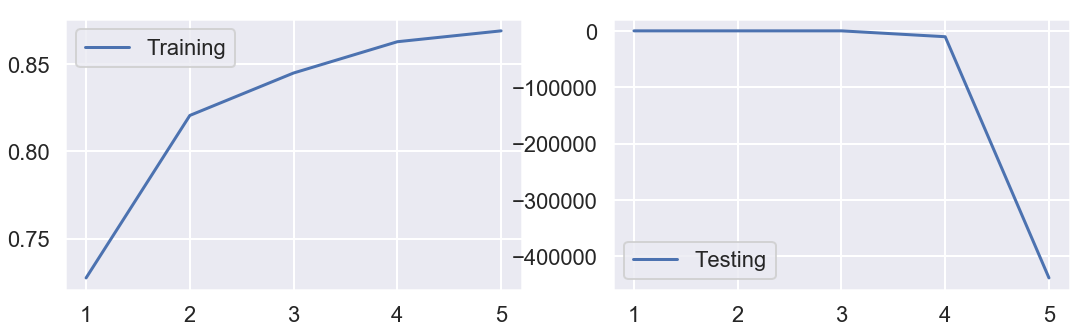

In [63]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');

**Answer: The model with degree 3 gives the best result**